In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    # @save
    '''生成y=Xw+b+噪声'''
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.9627, -0.2767]) 
label: tensor([3.2082])


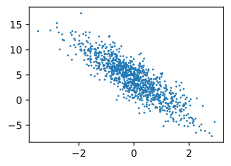

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 打乱，随机读取
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.7407,  1.3053],
        [ 0.3611, -0.5364],
        [-0.4723,  0.0482],
        [-0.1477,  1.9691],
        [-1.1132, -0.1243],
        [ 0.3082, -0.4170],
        [-0.1688, -0.5955],
        [ 0.3447, -0.8185],
        [ 0.0608, -1.0613],
        [-0.7361, -0.2179]]) 
 tensor([[-1.7173],
        [ 6.7421],
        [ 3.1044],
        [-2.7844],
        [ 2.3953],
        [ 6.2213],
        [ 5.8680],
        [ 7.6669],
        [ 7.9292],
        [ 3.4516]])


In [8]:
X.shape, y.shape

(torch.Size([10, 2]), torch.Size([10, 1]))

In [9]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [10]:
def linreg(X, w, b):
    # @save
    '''线性回归模型'''
    return torch.matmul(X, w) + b

In [11]:
def squared_loss(y_hat, y):
    # @save
    '''均方损失'''
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [12]:
def sgd(params, lr, batch_size):
    # @save
    '''小批量随机梯度下降'''
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [13]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [14]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size)，而不是一个标量
        # l中的所有元素被加到一起，并一次计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print('epch %d, loss %.6f' % (epoch+1, float(train_l.mean())))

epch 1, loss 0.039858
epch 2, loss 0.000147
epch 3, loss 0.000049


In [15]:
print('w的估计误差：', true_w - w.reshape(true_w.shape))
print('b的估计误差：', true_b - b)

w的估计误差： tensor([ 0.0010, -0.0004], grad_fn=<SubBackward0>)
b的估计误差： tensor([0.0008], grad_fn=<RsubBackward1>)
